In [8]:
!rm /App/output/aggregated_10.csv
!rm -rf /App/output/train_10
!mkdir /App/output/train_10

rm: cannot remove '/App/output/aggregated_10.csv': No such file or directory


## Initial test

### RTT scheduler

In [9]:
%%bash

cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 10 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

4256.51
Serving new connection: dbbd87dceec4679f, version 512 from 10.0.0.1:53329
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of dbbd87dceec4679f
Path 0: sent 7 retrans 1 lost 0; rcv 6 rtt 929.699ms
Congestion Window: 46720
Path 3: sent 1213 retrans 0 lost 0; rcv 576 rtt 146.117ms
Congestion Window: 90520
Path 1: sent 430 retrans 0 lost 0; rcv 210 rtt 635.263ms
Congestion Window: 90520


*** Error setting resource limits. Mininet's performance may be affected.


### Trained DQNAgent

In [10]:
%%bash

cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 10 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

4874.58
Serving new connection: c19c58dd5a581105, version 512 from 10.0.0.1:59081
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of c19c58dd5a581105
Path 0: sent 505 retrans 1 lost 0; rcv 221 rtt 313.174ms
Congestion Window: 91980
Path 3: sent 546 retrans 1 lost 0; rcv 261 rtt 289.213ms
Congestion Window: 80300
Path 1: sent 604 retrans 5 lost 0; rcv 289 rtt 308.615ms
Congestion Window: 97820


*** Error setting resource limits. Mininet's performance may be affected.


## Comparison

In [11]:
%%bash
rm /App/logs/client.logs
echo 24050 > /App/output/train_10/validate_24050.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 10 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_10/validate_24050.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
( ip link del s1-eth3 ) 2> /dev/null
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup co

In [16]:
%%bash
rm /App/logs/client.logs
echo 0 > /App/output/train_10/validate_rtt.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 10  --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_10/validate_rtt.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup complete.
*** Error setting resource li

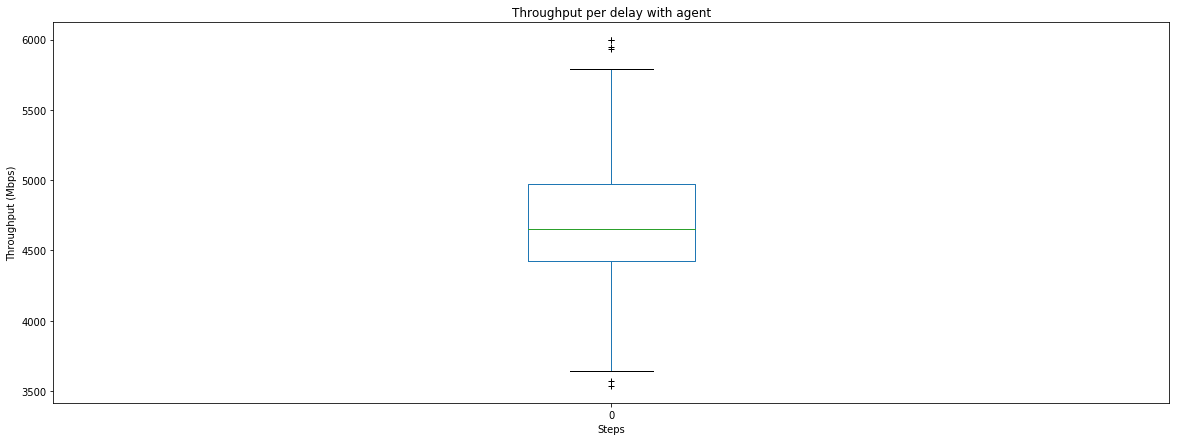

In [17]:
import pandas


rtt_sch = pandas.read_csv("/App/output/train_10/validate_rtt.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)


(2*8 * 1024 * 1024 / rtt_sch).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

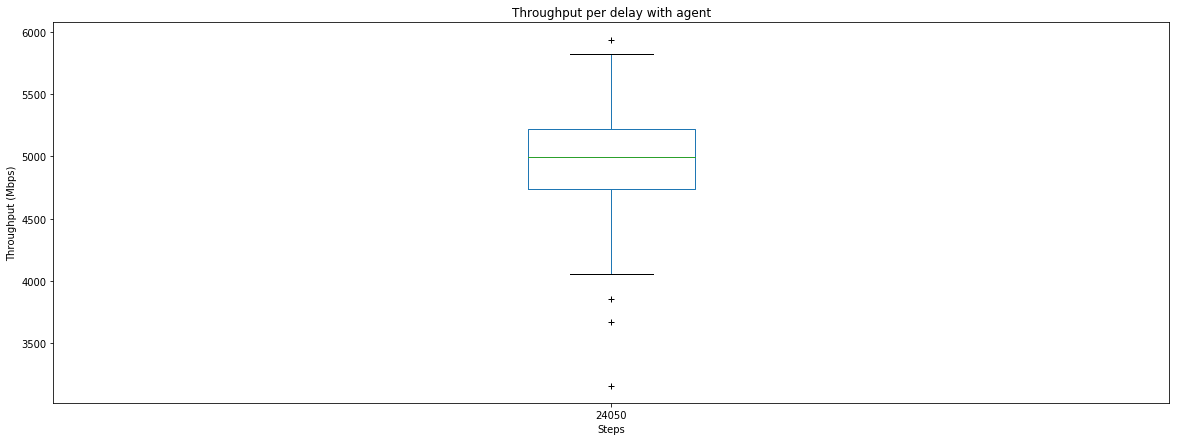

In [18]:
rtt_24050= pandas.read_csv("/App/output/train_10/validate_24050.csv")
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)
(2*8 * 1024 * 1024 / rtt_24050).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [19]:
(2*8 * 1024 * 1024 / rtt_24050).median()

24050    4991.882758
dtype: float64

In [20]:
(2*8 * 1024 * 1024 / rtt_24050).mean()

24050    4965.78664
dtype: float64

In [21]:
(2*8 * 1024 * 1024 / rtt_sch).median()

0    4649.942752
dtype: float64

In [22]:
(2*8 * 1024 * 1024 / rtt_sch).mean()

0    4719.09149
dtype: float64